In [1]:
import os, glob, random

import numpy as np
import pandas as pd

from scipy.signal import savgol_filter

from gtda.diagrams import BettiCurve
from gtda.plotting import plot_diagram
from gtda.homology import VietorisRipsPersistence

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

#### TDA helper methods

In [2]:
def compute_norm_betti_persistence_curve(barcode, step, curve_max):
    
    linetraverse = np.arange(0, curve_max, step)
    curvvalues = []
    totalpoints = len(barcode)
    
    for i in linetraverse:
        value = 0
        for(a,b) in barcode:
            if((a < i) & (b > i)):
                value = value + 1
        curvvalues.append(value/totalpoints)
        
    return (linetraverse, curvvalues)

#### Plot by cell type

In [3]:
cell_type = "NeuN"
dim = 0
disp_persdiag = False
color_dict = {"0D":"indigo", "5D":"darkred", "15D":"darkgreen", "30D":"gold"}

M34	15D	192054 cells	12225 sampled 	 (6.37%)
M16	15D	164501 cells	8182 sampled 	 (4.97%)
M43	0D	222269 cells	13147 sampled 	 (5.91%)
M40	0D	249223 cells	13344 sampled 	 (5.35%)


/home/labmember/anaconda2/envs/py38/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


M39	0D	263788 cells	14900 sampled 	 (5.65%)
M35	30D	222568 cells	14994 sampled 	 (6.74%)
M27	30D	213799 cells	11665 sampled 	 (5.46%)
M37	15D	242916 cells	14842 sampled 	 (6.11%)
M42	0D	177936 cells	12040 sampled 	 (6.77%)
M03	5D	208445 cells	13723 sampled 	 (6.58%)
M33	5D	247112 cells	14445 sampled 	 (5.85%)
M12	5D	269527 cells	13454 sampled 	 (4.99%)
M15	5D	267655 cells	14277 sampled 	 (5.33%)
M02	30D	230386 cells	14630 sampled 	 (6.35%)
M01	5D	199865 cells	11607 sampled 	 (5.81%)
M11	5D	251525 cells	12563 sampled 	 (4.99%)
M04	15D	231159 cells	13205 sampled 	 (5.71%)
M20	30D	213813 cells	13781 sampled 	 (6.45%)
M21	30D	267052 cells	13299 sampled 	 (4.98%)
M36	15D	196171 cells	13878 sampled 	 (7.07%)
M31	5D	176531 cells	9321 sampled 	 (5.28%)
M05	30D	193123 cells	11240 sampled 	 (5.82%)
M24	15D	254548 cells	12139 sampled 	 (4.77%)
M25	30D	280038 cells	15535 sampled 	 (5.55%)
M41	0D	217195 cells	12922 sampled 	 (5.95%)
M10	30D	208674 cells	13237 sampled 	 (6.34%)
M14	30D	191347 cells	

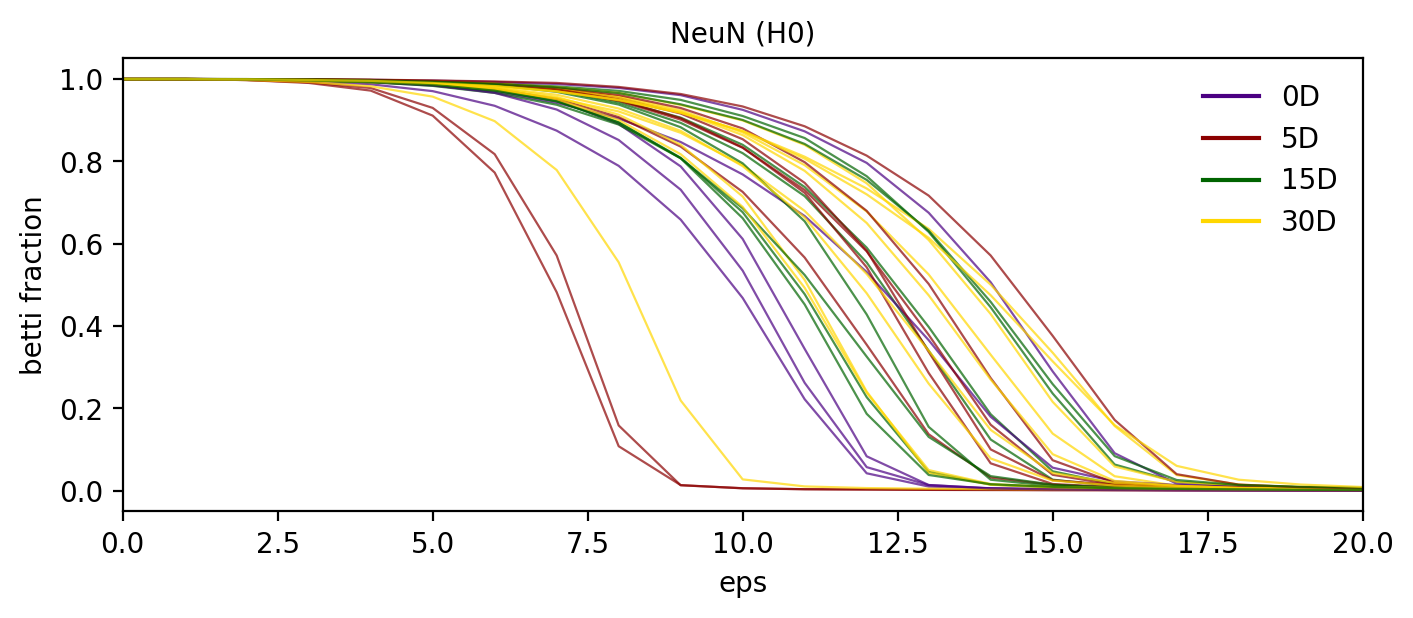

In [4]:
plt.figure(figsize=(8,3), dpi=200)

for csvfname in glob.glob(os.path.join("data", cell_type, "*.csv")):
    
    fname_parts = os.path.splitext(os.path.basename(csvfname))[0].split("_")
    ctype = fname_parts[-1]
    dpi = fname_parts[-2]
    mid = fname_parts[-3]
    
    df = pd.read_csv(csvfname)
    tda = np.load(os.path.join("results", cell_type, mid+"_"+dpi+"_"+cell_type+".npy"), allow_pickle=True).item()
    
    totcells = df.shape[0]
    nsampled = tda["data"].shape[0]
    
    betti_curve = tda["bc"][0][dim]
    
    if disp_persdiag:
        idx = tda["dgm"][:,2] == dim
        if dim == 0:
            ax = plt.gca()
            parts = ax.violinplot(tda["dgm"][idx,1]/nsampled, showmeans=False, showmedians=False, 
                                  showextrema=False)
            for pc in parts['bodies']:
                pc.set_facecolor("none")
                pc.set_edgecolor(color_dict[dpi])
                pc.set_alpha(0.7)
        else:
            plt.scatter(tda["dgm"][idx,0], tda["dgm"][idx,1], s=0.2, alpha=0.7, color=color_dict[dpi])
    else:
        plt.plot(betti_curve/nsampled, linewidth=0.8, alpha=0.7, color=color_dict[dpi])
    
    print(mid + "\t" + dpi + "\t" + str(totcells) + " cells\t" + str(nsampled) + 
          " sampled \t (" + str(np.round(nsampled*100/totcells, 2)) + "%)")
    
plt.plot(np.NaN, np.NaN, '-', color="indigo", label="0D")
plt.plot(np.NaN, np.NaN, '-', color="darkred", label="5D")
plt.plot(np.NaN, np.NaN, '-', color="darkgreen", label="15D")
plt.plot(np.NaN, np.NaN, '-', color="gold", label="30D")

if disp_persdiag:
    if dim == 0:
        plt.xticks([])
        plt.ylabel("log(Interval End)", fontsize=10)
        plt.yscale("log")
    else:
        plt.xlabel("Interval Start", fontsize=10)
        plt.ylabel("Interval End", fontsize=10)
else:
    plt.xlabel("eps", fontsize=10)
    plt.ylabel("betti fraction", fontsize=10)
    
    
plt.title(cell_type + " (H" + str(dim) + ")", fontsize=10)
leg = plt.legend(frameon=False)
plt.xlim(0,20)
leg.get_frame().set_facecolor("none")
plt.show()

#### Plot by DPI

In [5]:
days_post_injury = 30
dim = 0
disp_persdiag = False
color_dict = {"NeuN":"darkred", "Gfap":"darkgreen", "Iba1":"indigo"}

M21	Iba1	66938 cells	13238 sampled 	 (19.78%)
M02	Iba1	53429 cells	13350 sampled 	 (24.99%)
M05	Iba1	69097 cells	12395 sampled 	 (17.94%)
M25	Iba1	102220 cells	14011 sampled 	 (13.71%)
M14	Iba1	51091 cells	10738 sampled 	 (21.02%)
M20	Iba1	63992 cells	13315 sampled 	 (20.81%)
M27	Iba1	62588 cells	10448 sampled 	 (16.69%)
M32	Iba1	54516 cells	11490 sampled 	 (21.08%)
M35	Iba1	41244 cells	11543 sampled 	 (27.99%)
M10	Iba1	80852 cells	12900 sampled 	 (15.96%)
M35	NeuN	222568 cells	14994 sampled 	 (6.74%)
M27	NeuN	213799 cells	11665 sampled 	 (5.46%)
M02	NeuN	230386 cells	14630 sampled 	 (6.35%)
M20	NeuN	213813 cells	13781 sampled 	 (6.45%)
M21	NeuN	267052 cells	13299 sampled 	 (4.98%)
M05	NeuN	193123 cells	11240 sampled 	 (5.82%)
M25	NeuN	280038 cells	15535 sampled 	 (5.55%)
M10	NeuN	208674 cells	13237 sampled 	 (6.34%)
M14	NeuN	191347 cells	11517 sampled 	 (6.02%)
M32	NeuN	173734 cells	12448 sampled 	 (7.16%)
M21	Gfap	153760 cells	11962 sampled 	 (7.78%)
M32	Gfap	120237 cells	11225 sampl

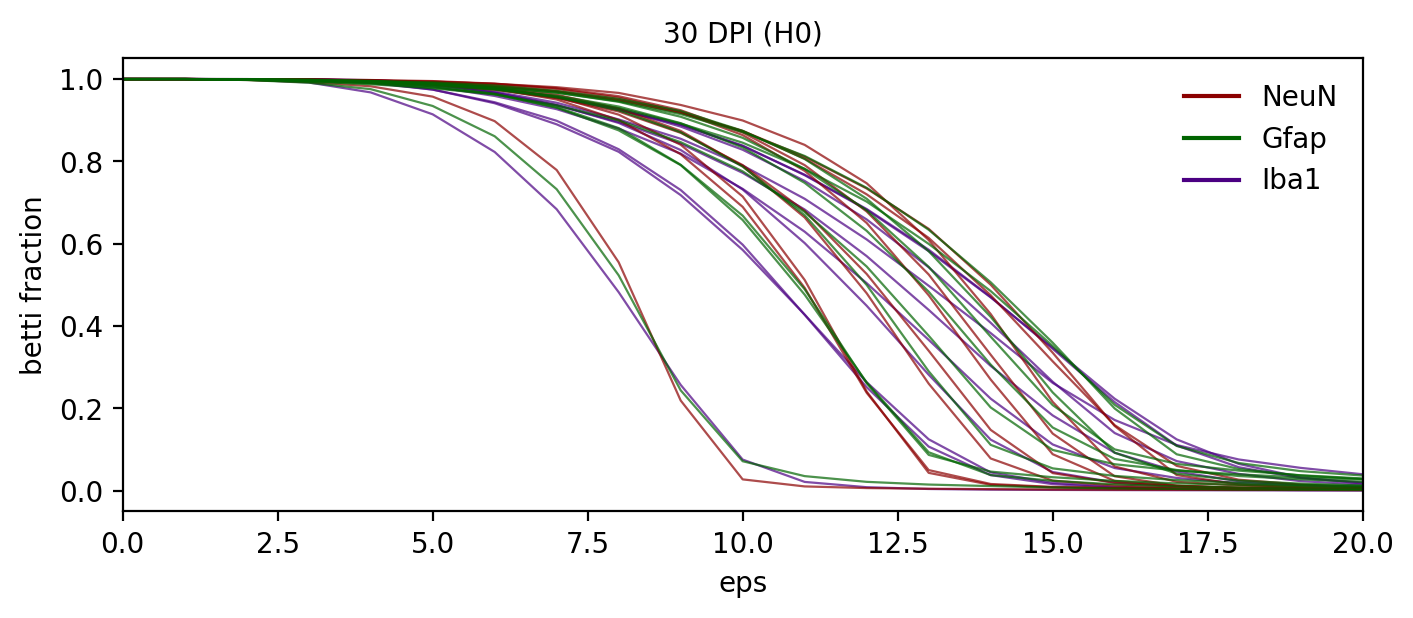

In [6]:
plt.figure(figsize=(8,3), dpi=200)

for csvfname in glob.glob(os.path.join("data", "*", "*.csv")):
    
    fname_parts = os.path.splitext(os.path.basename(csvfname))[0].split("_")
    ctype = fname_parts[-1]
    dpi = fname_parts[-2]
    mid = fname_parts[-3]
    
    if int(dpi[:-1]) == days_post_injury:
        
        df = pd.read_csv(csvfname)
        tda = np.load(os.path.join("results", ctype, mid+"_"+dpi+"_"+ctype+".npy"), allow_pickle=True).item()

        totcells = df.shape[0]
        nsampled = tda["data"].shape[0]

        print(mid + "\t" + ctype + "\t" + str(totcells) + " cells\t" + str(nsampled) + 
          " sampled \t (" + str(np.round(nsampled*100/totcells, 2)) + "%)")
        
        betti_curve = tda["bc"][0][dim]

        if disp_persdiag:
            idx = tda["dgm"][:,2] == dim
            if dim == 0:
                ax = plt.gca()
                parts = ax.violinplot(tda["dgm"][idx,1], showmeans=False, showmedians=False, showextrema=False)
                for pc in parts['bodies']:
                    pc.set_facecolor("none")
                    pc.set_edgecolor(color_dict[ctype])
                    pc.set_alpha(0.7)
            else:
                plt.scatter(tda["dgm"][idx,0], tda["dgm"][idx,1], s=0.2, alpha=0.7, color=color_dict[ctype])
        else:
            plt.plot(betti_curve/nsampled, linewidth=0.8, alpha=0.7, color=color_dict[ctype])
            
plt.plot(np.NaN, np.NaN, '-', color="darkred", label="NeuN")
plt.plot(np.NaN, np.NaN, '-', color="darkgreen", label="Gfap")
plt.plot(np.NaN, np.NaN, '-', color="indigo", label="Iba1")

if disp_persdiag:
    if dim == 0:
        plt.xticks([])
        plt.ylabel("log(Interval End)", fontsize=10)
        plt.yscale("log")
    else:
        plt.xlabel("Interval Start", fontsize=10)
        plt.ylabel("Interval End", fontsize=10)
else:
    plt.xlabel("eps", fontsize=10)
    plt.ylabel("betti fraction", fontsize=10)
    
plt.title(str(days_post_injury) + " DPI (H" + str(dim) + ")", fontsize=10)
leg = plt.legend(frameon=False)
plt.xlim(0,20)
leg.get_frame().set_facecolor("none")
plt.show()

#### Plot by mouse ID

In [7]:
mouse_id = 16
px2um = 1.3

disp_persdiag = False
plt_H0 = True
plt_H1 = True
plt_pairs = True

color_dict = {"NeuN":"darkred", "Gfap":"darkgreen", "Iba1":"indigo",
             "Iba_Gfap":"violet", "Iba_NeuN":"magenta", "Gfap_NeuN":"gold",
             "Iba_Gfap_NeuN": "darkgray"}

15D	Iba1	75989 cells	10930 sampled 	 (14.38%)
15D	NeuN	164501 cells	8182 sampled 	 (4.97%)
15D	Gfap	158494 cells	10648 sampled 	 (6.72%)
15D	Iba + Gfap	11653 sampled
15D	Iba + NeuN	11679 sampled
15D	Gfap + NeuN	11693 sampled
15D	Iba + Gfap + NeuN	11921 sampled


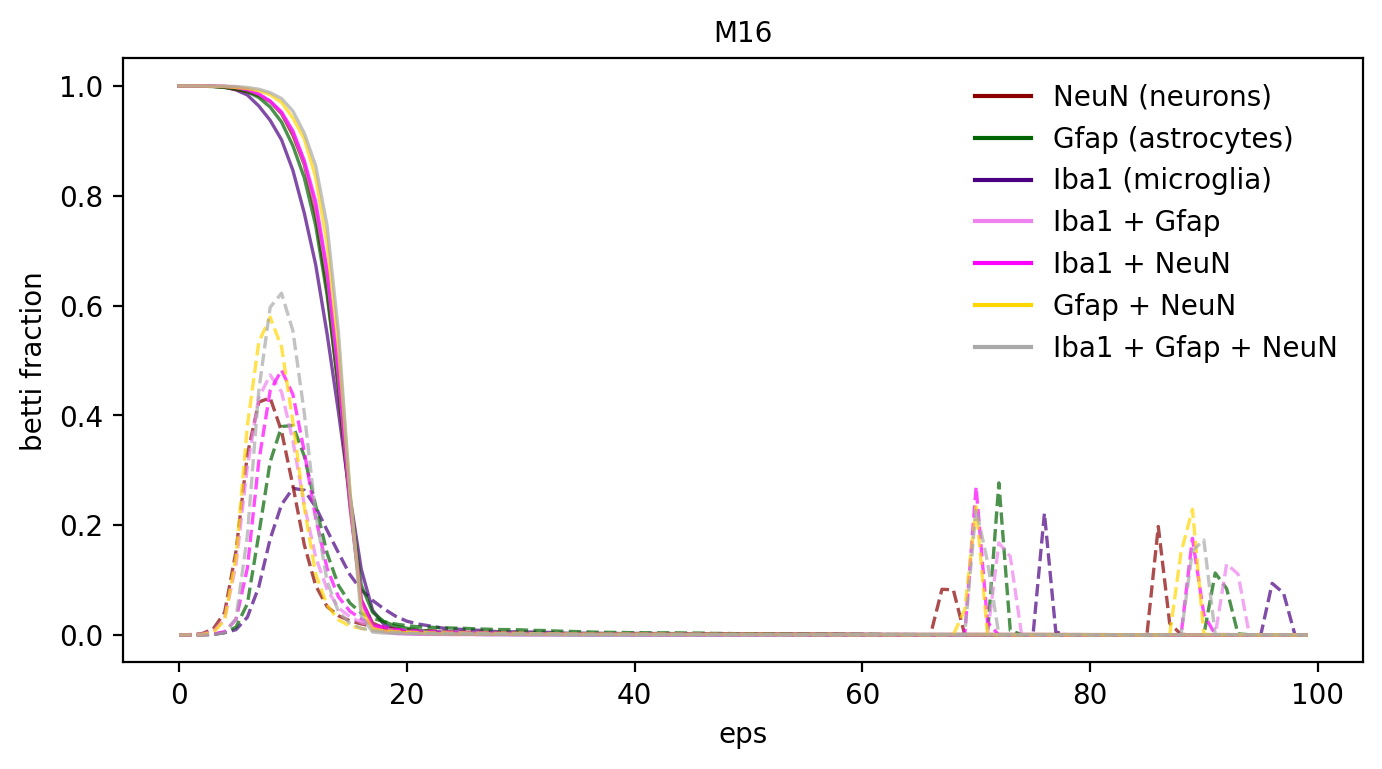

In [8]:
plt.figure(figsize=(8,4), dpi=200)

for csvfname in glob.glob(os.path.join("data", "*", "*.csv")):
    
    fname_parts = os.path.splitext(os.path.basename(csvfname))[0].split("_")
    ctype = fname_parts[-1]
    dpi = fname_parts[-2]
    mid = fname_parts[-3]
    
    if int(mid[1:]) == mouse_id:
        
        df = pd.read_csv(csvfname)
        tda = np.load(os.path.join("results", ctype, mid+"_"+dpi+"_"+ctype+".npy"), allow_pickle=True).item()

        totcells = df.shape[0]
        nsampled = tda["data"].shape[0]
        
        print(dpi + "\t" + ctype + "\t" + str(totcells) + " cells\t" + str(nsampled) + 
          " sampled \t (" + str(np.round(nsampled*100/totcells, 2)) + "%)")

        if disp_persdiag:
            if plt_H0:
                idx = tda["dgm"][:,2] == 0
                plt.scatter(px2um*tda["dgm"][idx,0], px2um*tda["dgm"][idx,1], s=0.2, alpha=0.7, 
                            color=color_dict[ctype])
            if plt_H1:
                idx = tda["dgm"][:,2] == 1
                plt.scatter(px2um*tda["dgm"][idx,0], px2um*tda["dgm"][idx,1], s=0.2, alpha=0.7, 
                            color=color_dict[ctype])
        else:
            if plt_H0:
                betti_curve_h0 = tda["bc"][0][0]
                plt.plot(betti_curve_h0/nsampled, '-', linewidth=1.2, alpha=0.7, color=color_dict[ctype])
            if plt_H1:
                betti_curve_h1 = tda["bc"][0][1]
                plt.plot(betti_curve_h1/nsampled, '--', linewidth=1.2, alpha=0.7, color=color_dict[ctype])

if plt_pairs: 

    for npyfname in glob.glob(os.path.join("results_pairs", "*.npy")):

        fname_parts = os.path.splitext(os.path.basename(npyfname))[0].split("_")
        mid = fname_parts[0]
        dpi = fname_parts[1]

        if int(mid[1:]) == mouse_id:
            
            for pair in ["Iba_Gfap", "Iba_NeuN", "Gfap_NeuN", "Iba_Gfap_NeuN"]:

                dat = np.load(npyfname, allow_pickle=True).item()
                
                n_samples = dat[pair+'_ptcloud'].shape[0]

                print(dpi + "\t" + " + ".join(pair.split("_")) + "\t" + str(n_samples) + " sampled")

                if disp_persdiag:

                    if plt_H0:
                        idx = dat[pair+"_dgm"][:,2] == 0
                        plt.scatter(dat[pair+"_dgm"][idx,0], dat[pair+"_dgm"][idx,1], s=0.2, alpha=0.7, 
                                    color=color_dict[pair])
                    if plt_H1:
                        idx = dat[pair+"_dgm"][:,2] == 1
                        plt.scatter(dat[pair+"_dgm"][idx,0], dat[pair+"_dgm"][idx,1], s=0.2, alpha=0.7, 
                                    color=color_dict[pair])
                        
                else:

                    if plt_H0:
                        betti_curve_h0 = dat[pair+'_bc'][0][0]
                        plt.plot(betti_curve_h0/n_samples, '-', linewidth=1.2, alpha=0.7, 
                                 color=color_dict[pair])
                    if plt_H1:
                        betti_curve_h1 = dat[pair+'_bc'][0][1]
                        plt.plot(betti_curve_h1/n_samples, '--', linewidth=1.2, alpha=0.7, 
                                 color=color_dict[pair])

plt.plot(np.NaN, np.NaN, '-', color="darkred", label="NeuN (neurons)")
plt.plot(np.NaN, np.NaN, '-', color="darkgreen", label="Gfap (astrocytes)")
plt.plot(np.NaN, np.NaN, '-', color="indigo", label="Iba1 (microglia)")

if plt_pairs: 
    plt.plot(np.NaN, np.NaN, '-', color="violet", label="Iba1 + Gfap")
    plt.plot(np.NaN, np.NaN, '-', color="magenta", label="Iba1 + NeuN")
    plt.plot(np.NaN, np.NaN, '-', color="gold", label="Gfap + NeuN")
    plt.plot(np.NaN, np.NaN, '-', color="darkgray", label="Iba1 + Gfap + NeuN")

if disp_persdiag:
    plt.xlabel("Interval Start (um)", fontsize=10)
    plt.ylabel("Interval End (um)", fontsize=10)
else:
    plt.xlabel("eps", fontsize=10)
    plt.ylabel("betti fraction", fontsize=10)
    
plt.title("M"+str(mouse_id), fontsize=10)
leg = plt.legend(frameon=False)
leg.get_frame().set_facecolor("none")
#plt.xscale("log")
#plt.yscale("log")
plt.show()